**Disclaimer:**
The code provided contain errors as they were my actual answer to the questions.

In [ ]:
from google.colab import files
x = files.upload()

Saving q1b(3).fasta to q1b(3).fasta
Saving q2.txt to q2 (1).txt
Saving q3(1).pdb to q3(1).pdb


**Question 1:**

a. Using regular expression, extract name of scientist and their date of birth given in the string text. (**2 marks**)

```
text='Date of Birth of famous scientists are: Prof. Einstein date of birth is 3/14/1879. Prof. Higgs date of birth is 05-29-1929. Prof. Neils Bohr date of birth is 10-7-85'
```

In [ ]:
text='Date of Birth of famous scientists are: Prof. Einstein date of birth is 3/14/1879. Prof. Higgs date of birth is 05-29-1929. Prof. Neils Bohr date of birth is 10-7-85'
import re
m = re.findall(r'.+(Prof. \w+).*(\d{2}[/-]\d{2}[/-]\d{4})',text)
print(m)

[('Prof. Higgs', '05-29-1929')]


**Question 1:**

b. Read the fasta file (**q1b.fasta**) and convert header of each sequence into new format. Write the new header and sequence as output. Use regular expression.
The header conversion in the new format as given below (**4 marks**)

Input format:
```
x='>embl|NM_001300425.1 Drosophila melanogaster pAkt kinase (Akt), transcript variant E, mRNA'
```
 converted to:
```
>NM_001300425_D.melanogaster_embl_mRNA_Akt

The entry after '>' could be embl, ddbj, ncbi
Organism name is two word long and text between organism name and protein kinase name in the bracket is also two words long.
The Protein kinase name the entry in the bracket along with bracket may be missing in some headers.
```



In [ ]:
def New(file):
  new=""
  f = open(file)
  for i in f.readlines():
    if i[0:1]=='>':
      m=re.findall(r'',i)
      new+=f""
    else:
      new+=i

  return new

y=New('q1b.fasta')
print(y)

**Question 2**

A file (q2.txt) has list of marks in five subjects for a group of students. The roll no and marks are separated by ';'. Do the following:     **(7 marks)**

a. Find the average marks of each student.

b. Find subject average marks.

In [ ]:
def marks(file):
  d={}
  f=open(file)
  for line in f.readlines():
    m=re.findall(r'(\w+);(\w+);(\w+);(\w+);(\w+);(\w+)',line)
    print(m)
    # d[m[]]

Mdata = marks('q2.txt')
print(Mdata)

[]
[('AP0001', '91', '66', '53', '35', '28')]
[('AP0002', '100', '41', '80', '62', '69')]
[('AP0003', '92', '67', '86', '67', '78')]
[('AP0004', '100', '88', '34', '42', '87')]
[('AP0005', '44', '34', '63', '52', '44')]
[('AP0006', '59', '34', '83', '33', '24')]
None


**Question 3**

Read pdbfile q3.pdb and do the following: (**12 marks**)

a. Write a function to read pdb file, which outputs data in relevant format for calculation as required in (b). Function should have documentation and should accept keyword argument.

b. Find distance between 'N' and CG2 atom of the same residue and plot histogram of the distances Label graph appropriately with X label, Y-label and title. Find names of residues have CG2 atoms.

**Feature        START END position in the line**

atomname         13    16

resid            23    26

X-coordinate     31    38

Y-coordinate     39    46

Z-coordinate     47    54


{'6': {'resname': 'ALA', 'N': [33.511, 63.6, 136.831], 'CA': [33.888, 64.814, 137.615], 'C': [34.82, 64.441, 138.758], 'O': [34.537, 63.519, 139.528], 'CB': [32.64, 65.537, 138.155]}, '7': {'resname': 'LYS', 'N': [35.93, 65.165, 138.853], 'CA': [36.827, 65.078, 139.997], 'C': [36.086, 65.573, 141.224], 'O': [36.213, 64.993, 142.305], 'CB': [38.068, 65.947, 139.766], 'CG': [38.912, 65.516, 138.579], 'CD': [40.135, 66.403, 138.417], 'CE': [41.4, 65.564, 138.285], 'NZ': [41.161, 64.243, 137.598]}, '8': {'resname': 'LEU', 'N': [35.31, 66.645, 141.042], 'CA': [34.525, 67.254, 142.118], 'C': [33.497, 66.286, 142.71], 'O': [33.227, 66.339, 143.906], 'CB': [33.815, 68.537, 141.642], 'CG': [34.561, 69.634, 140.856], 'CD1': [35.565, 70.394, 141.723], 'CD2': [35.225, 69.085, 139.576]}, '9': {'resname': 'TRP', 'N': [32.927, 65.421, 141.87], 'CA': [31.945, 64.427, 142.333], 'C': [32.642, 63.361, 143.165], 'O': [32.143, 62.965, 144.22], 'CB': [31.202, 63.797, 141.147], 'CG': [30.263, 62.68, 141.503]

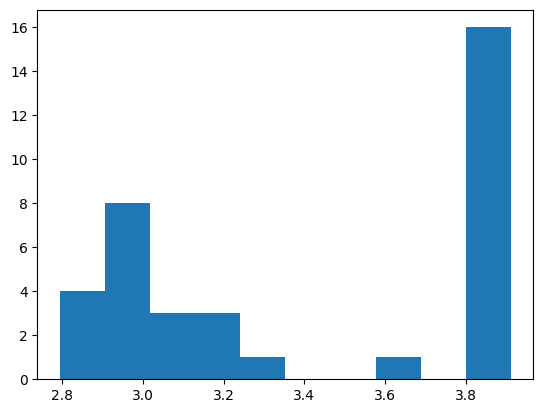

Residues which contain CG2 :
['VAL', 'ILE', 'ILE', 'VAL', 'THR', 'THR', 'ILE', 'VAL', 'VAL', 'THR', 'THR', 'ILE', 'VAL', 'ILE', 'VAL', 'VAL', 'THR', 'ILE', 'THR', 'THR', 'ILE', 'ILE', 'VAL', 'VAL', 'ILE', 'ILE', 'THR', 'VAL', 'ILE', 'THR', 'ILE', 'THR', 'ILE', 'ILE', 'THR', 'THR']


In [ ]:
def generate(file):
  """This a function which will return the PDB datain a dictionary format."""
  data = {}
  f=open(file)
  for line in f.readlines():
    if line.startswith('ATOM'):
      resid = line[23:26].strip()
      resname = line[17:20].strip()
      atom = line[13:16].strip()
      x_co = float(line[31:39].strip())
      y_co = float(line[39:46].strip())
      z_co = float(line[47:54].strip())
      if resid not in data:
        data[resid] = {'resname':resname}

      if atom not in data[resid]:
        data[resid][atom] = [x_co,y_co,z_co]

  return data

PDBdata = generate(file = 'q3.pdb')
print(PDBdata)


import math
def cal_dist(v1,v2):
  v_diff = [v2[i]-v1[i] for i in range(3)]
  return math.sqrt(sum(v**2 for v in v_diff))

def dist(pdbdata):
  distances = []
  for resid,data in pdbdata.items():
    if 'N' and 'CG2' in data:
      v1 = data['N']
      v2 = data['CG2']
      d = cal_dist(v1,v2)
      distances.append(d)

  return distances

Distances = dist(PDBdata)
print(Distances)

import matplotlib.pyplot as plt
plt.hist(Distances)
plt.show()


x=[]
for resid,data in PDBdata.items():
  resname = data['resname']
  if 'CG2' in data:
    x.append(resname)

print(f"Residues which contain CG2 :\n{x}")

In [ ]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    an implicit,  MATLAB-like, way of plotting.  It also opens figures on your
    screen, and acts as the figure GUI manager.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The explicit object-oriented API is recommended for complex plots, though
    pyplot is still usually used to create the figure and often the axes in the
    figure. See `.pyplot.figure`, `.pyplot.subplots`, and
    `.pyplot.subplot_mosaic` to create figures, and
    :doc:`Axes API </api/axes_api>` for the plotting methods on an Axes::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.